#Q1


Gradient Boosting Regression is a machine learning technique that belongs to the family of ensemble methods. It is particularly effective for regression problems, where the goal is to predict a continuous output variable. Gradient Boosting Regression builds an ensemble of weak learners (typically decision trees) sequentially, with each new learner trained to correct the errors made by the ensemble so far.

The key idea behind Gradient Boosting Regression is to minimize the residuals (the differences between the predicted values and the actual values) in a gradient descent-like fashion. In each iteration, a new weak learner is added to the ensemble, and its task is to predict the negative gradient of the loss function with respect to the current ensemble's predictions. The predictions of the new weak learner are then added to the ensemble, adjusting the overall prediction.

Here are the general steps of Gradient Boosting Regression:

Initialize Model:

Initialize the model with a simple predictor, usually the mean of the target variable.
Compute Residuals:

Compute the residuals by subtracting the current ensemble's predictions from the actual target values.
Train a Weak Learner:

Train a weak learner (often a decision tree) to predict the negative gradient of the loss function with respect to the current ensemble's predictions.
The weak learner is fitted to the residuals, focusing on the parts of the data where the model is performing poorly.
Update Ensemble:

Add the predictions of the new weak learner to the current ensemble, adjusting the overall prediction.
Repeat:

Repeat steps 2-4 for a predefined number of iterations or until a stopping criterion is met.
Final Prediction:

The final prediction is the sum of the predictions from all weak learners in the ensemble.

Mean Squared Error: 0.0219
R-squared: 0.9522


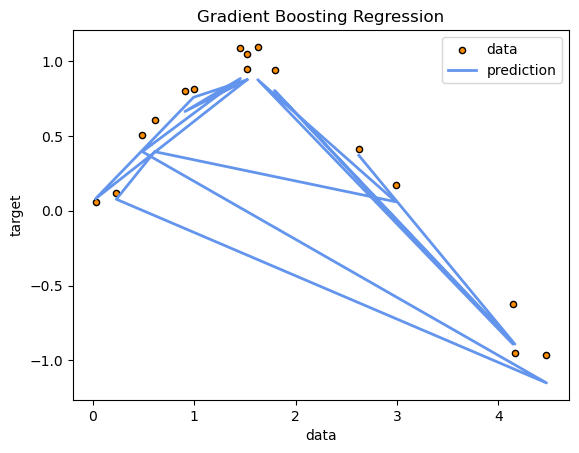

In [3]:
#Q2

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        predictions = np.full_like(y, np.mean(y))

        for _ in range(self.n_estimators):
            residuals = y - predictions

            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, residuals)

            predictions += self.learning_rate * tree.predict(X)

            self.models.append(tree)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += self.learning_rate * model.predict(X)

        return predictions

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", linewidth=2, label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()


In [10]:
#Q3


from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingRegressor()

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_gb_model = GradientBoostingRegressor(**best_params)
best_gb_model.fit(X_train, y_train)

y_pred_best = best_gb_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print(f"Best Mean Squared Error: {mse_best:.4f}")
print(f"Best R-squared: {r2_best:.4f}")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Mean Squared Error: 0.0101
Best R-squared: 0.9780


#Q4


In the context of Gradient Boosting, a weak learner refers to a base model or a simple hypothesis that performs slightly better than random chance on a given task. Weak learners are typically models with limited complexity, such as shallow decision trees, linear models, or even individual features. The key characteristic of a weak learner is that it has the ability to learn from the data, albeit with limitations.

The concept of using weak learners in Gradient Boosting is fundamental to the algorithm's success. In each iteration of the boosting process, a new weak learner is trained to correct the errors made by the ensemble of models built in the previous iterations. By sequentially adding weak learners, the algorithm constructs a strong learner that can capture complex patterns and relationships within the data.

Common types of weak learners used in Gradient Boosting include:

Decision Stumps: These are very shallow decision trees with only one level or node. Decision stumps make decisions based on a single feature and a simple threshold.

Shallow Decision Trees: Weak learners in the form of shallow decision trees are often used. These trees have a limited depth, typically just a few levels. The shallowness ensures that each tree is a weak predictor on its own.

Linear Models: In some cases, simple linear models, such as linear regression or logistic regression, can be used as weak learners. However, decision trees are more commonly employed due to their effectiveness in capturing non-linear relationships.

#Q5


The intuition behind the Gradient Boosting algorithm lies in the iterative process of combining weak learners to create a strong learner. The algorithm builds an ensemble of models sequentially, with each new model focusing on correcting the errors made by the existing ensemble. Here's a step-by-step intuition behind how Gradient Boosting works:

Start with a Simple Model:

Initialize the model with a simple predictor, often the mean of the target variable. This serves as the initial approximation.
Compute Residuals:

Calculate the residuals by subtracting the current predictions from the actual target values. These residuals represent the errors made by the current model.
Train a Weak Learner:

Fit a weak learner (e.g., a shallow decision tree) to the residuals. The weak learner is trained to capture the patterns and relationships that the current model has not yet learned.
Update Predictions:

Combine the predictions of the weak learner with the current predictions, adjusting the overall prediction. The combination is typically done by adding a fraction (learning rate) of the weak learner's predictions to the current predictions.
Repeat:

Repeat steps 2-4 for a predefined number of iterations or until a stopping criterion is met. Each iteration builds a new weak learner to correct the errors made by the ensemble so far.
Final Ensemble:

The final prediction is the sum (or weighted sum) of the predictions from all weak learners in the ensemble.
The intuition behind Gradient Boosting is to improve the model's performance by sequentially learning from its mistakes. Each weak learner contributes a piece of the overall solution, with a focus on capturing the remaining errors or residuals. The learning rate controls the contribution of each weak learner, preventing the algorithm from overfitting to the training data.

Key Points of Intuition:

Sequential Correction: The algorithm focuses on the mistakes of the existing ensemble, gradually improving its predictive performance.

Combining Weak Models: By combining multiple weak learners, each addressing a specific aspect of the data, the algorithm creates a strong, accurate predictive model.

Resilience to Overfitting: Techniques such as shrinkage (learning rate) and regularization are used to control the complexity of the model and prevent overfitting.

Versatility: Gradient Boosting is versatile and can be applied to various types of machine learning tasks, including regression, classification, and ranking problems.

#Q6


The Gradient Boosting algorithm builds an ensemble of weak learners in a sequential manner. The process involves iteratively training weak learners and combining their predictions to form an increasingly accurate ensemble. Here are the key steps in how Gradient Boosting builds this ensemble:

Initialize the Model:

Start with a simple model, often the mean of the target variable for regression problems or the log-odds for classification problems.
Compute Residuals:

Calculate the residuals by subtracting the current predictions from the actual target values. The residuals represent the errors made by the current model.
Train a Weak Learner:

Fit a weak learner (e.g., a shallow decision tree) to the residuals. The weak learner is trained to capture the patterns and relationships that the current model has not yet learned.
The weak learner focuses on the areas where the current model makes mistakes, attempting to correct those errors.
Update Predictions:

Combine the predictions of the weak learner with the current predictions from the ensemble. The combination is typically done by adding a fraction (learning rate) of the weak learner's predictions to the current predictions.
The update formula is: 
predictions
=
predictions
+
learning_rate
×
weak_learner_predictions
predictions=predictions+learning_rate×weak_learner_predictions
Repeat:

Repeat steps 2-4 for a predefined number of iterations or until a stopping criterion is met. Each iteration builds a new weak learner to correct the errors made by the ensemble so far.
The process of computing residuals, training a weak learner, and updating predictions is performed iteratively.
Final Ensemble:

The final prediction is the sum (or weighted sum) of the predictions from all weak learners in the ensemble.
For regression problems, the final prediction is the sum of the individual weak learner predictions.
For classification problems, the predictions are often combined using a weighted voting scheme.
Regularization:

The learning rate parameter controls the contribution of each weak learner. A smaller learning rate makes the ensemble more robust and helps prevent overfitting.

#Q7


Constructing the mathematical intuition behind the Gradient Boosting algorithm involves understanding the optimization process used to build the ensemble of weak learners. Below are the key steps involved in constructing the mathematical intuition of Gradient Boosting:

Objective Function:

Define an objective function that quantifies the difference between the current ensemble's predictions and the true values. For regression, this often involves minimizing the mean squared error, while for classification, it may involve minimizing a suitable loss function like cross-entropy.
Initialize with a Constant Prediction:

Start with a simple model that predicts a constant value, usually the mean (for regression) or log-odds (for classification) of the target variable. This serves as the initial approximation.
Compute Negative Gradient (Residuals):

Compute the negative gradient of the objective function with respect to the current ensemble's predictions. The negative gradient represents the residuals or errors made by the current model.
For regression, the negative gradient is the difference between the true values and the current predictions. For classification, it involves the gradient of the loss function.
Train a Weak Learner:

Fit a weak learner (e.g., a decision tree) to the negative gradient or residuals. The weak learner aims to capture the patterns and relationships in the data that the current model has not yet learned.
Compute Optimal Weight for the Weak Learner:

Determine the optimal weight (or learning rate) for the weak learner. This is often computed through a line search or optimization process to minimize the objective function.
Update Predictions:

Update the predictions of the ensemble by adding a fraction (learning rate times the weak learner's predictions) to the current predictions. This update is proportional to the negative gradient, correcting the errors made by the current ensemble.
The update formula is typically: 
predictions
=
predictions
+
learning_rate
×
weak_learner_predictions
predictions=predictions+learning_rate×weak_learner_predictions
Repeat:

Repeat steps 3-6 for a predefined number of iterations or until a stopping criterion is met. Each iteration introduces a new weak learner that focuses on the residuals not yet captured by the ensemble.
Final Ensemble:

The final ensemble is the sum (or weighted sum) of the predictions from all weak learners.
Regularization:

Introduce regularization through hyperparameters like the learning rate and tree depth. Smaller learning rates and shallower trees can help prevent overfitting.
Prediction for New Data:

To make predictions for new data, the new instance is passed through each weak learner, and the weighted sum of their predictions forms the final prediction of the ensemble.